# 1. Loading the dataset 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = (r"BostonHousing.csv")
df = pd.read_csv(filename)

In [2]:
# Steps for Model Building
# 0. Convert your Business problem into a Data Problem
# 1. Load the dataset
# 2. Exploratory Data Analysis:
# 3. Bare minimum data cleaning (e.g. missing value imputation) & 
# preprocessing (e.g. Encoding the cat. variables)

# 4. Create Baseline models

# 5. Data Polishing/Refinement: e.g. outlier treatment, scaling the num. features,
# Feature engineering, feature selection, feature transformation, etc.

# ===> Data is FInalized!!
# 6. Compare and Select the best model(s) for "tuning" 

# 7. Hyper-parameter tuning / Model Refinement

# 8. Re-train you final model on the entire data, one last time!

# 9. Save the model (pickelize)

# 10. Share/Deploy the model

# y = f(X)

# Model = Algo(Data)


#  2. Exploratory Data Analysis:



In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The dataset has 506 entries and 14 columns.consists of 11 float64 and 3 int64 columns representing various features. The target variable 'medv' is of type float64

In [4]:
df.isnull().sum()  

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

As we can see it does not contain any missing value

### Correlation analysis and visualization

In [5]:
corr_values = df.corr().round(2) #Calculating correlation value of the dataframe
corr_values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [6]:
corr_values[abs(corr_values) > 0.6] # Here we are Filtering correlation values with absolute value greater than 0.6

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,NaN
zn,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.00,NaN,0.76,NaN,0.64,-0.71,NaN,0.72,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.76,NaN,1.00,NaN,0.73,-0.77,0.61,0.67,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.61,0.70
age,NaN,NaN,0.64,NaN,0.73,NaN,1.00,-0.75,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,0.66,-0.71,NaN,-0.77,NaN,-0.75,1.00,NaN,NaN,NaN,NaN,NaN,NaN
rad,0.63,NaN,NaN,NaN,0.61,NaN,NaN,NaN,1.00,0.91,NaN,NaN,NaN,NaN
tax,NaN,NaN,0.72,NaN,0.67,NaN,NaN,NaN,0.91,1.00,NaN,NaN,NaN,NaN


###  Pairplot and heatmap visualization

C:\Users\Prashant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Prashant\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


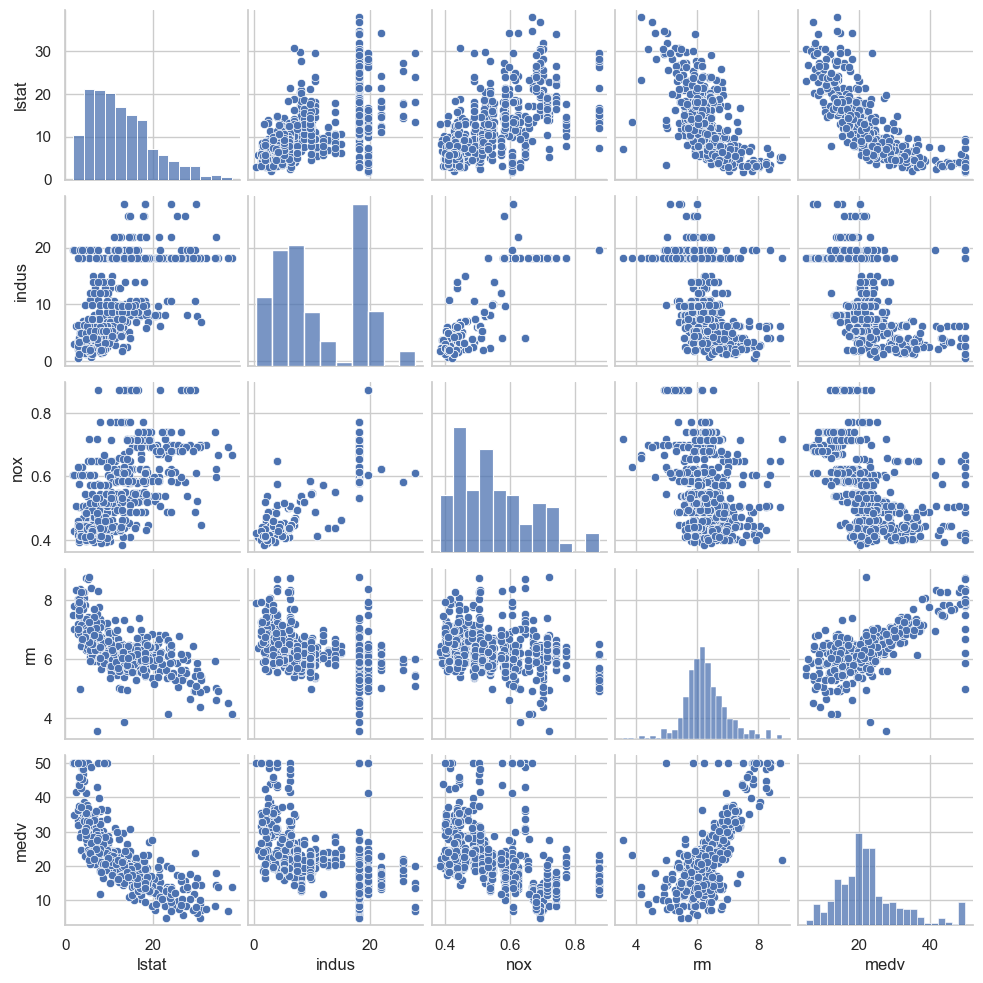

In [7]:
import seaborn as sns
sns.set(style='whitegrid')
cols = ['lstat', 'indus', 'nox', 'rm', 'medv']
sns.pairplot(df[cols], size=2)

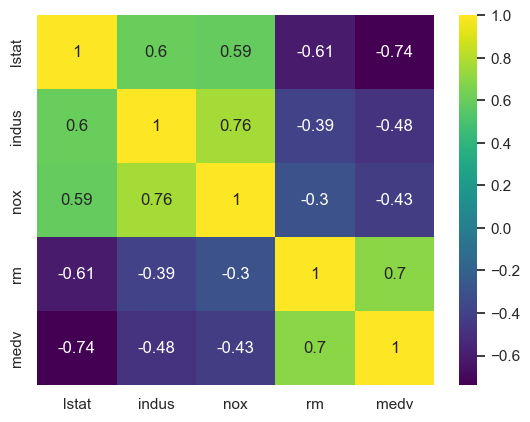

In [8]:
sns.heatmap(df[cols].corr().values, cbar=True, annot=True, yticklabels=cols, xticklabels=cols, cmap='viridis')
plt.show()

# EDA CAN CONTINUE ON AND ON ................

# 4. Create Baseline models


X contains the features (independent variables), and y contains the target variable (dependent variable). This separation allows us to use the features to predict the target variable during model training.







In [9]:
X = df.drop('medv', axis = 1)  
y = df['medv'] #Target Variable
X.shape

(506, 13)

### Splitting the data into training and validation set

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

we are using train_test_split function to divides the dataset into training and testing sets and  allocating 20% of the data for testing and 80% for training, with a fixed random seed 42.

# Linear Regression Model

In [62]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)   # training should be done on the training set.

LinearRegression()

In [63]:
LR.intercept_   # fetching the value of intercept_ attribute  (w0 ot beta0)

30.246750993923598

In [64]:
LR.coef_    # coef_ is also an attrbibute... (w1, w2 .... wj)

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

In [65]:
coef_df = pd.DataFrame(LR.coef_, index=X.columns, columns=['LR_Coef'])
coef_df

,LR_Coef
crim,-0.113056
zn,0.030110
indus,0.040381
chas,2.784438
nox,-17.202633
rm,4.438835
age,-0.006296
dis,-1.447865
rad,0.262430
tax,-0.010647


In [66]:
# fetch the R^2 of the model >> Evaluating the model
LR.score(X_test, y_test)  # validating our model's performance on the TEST SET.

0.6687594935356307

This means/conveys that our LR model has captured 66.8% of the variation (pattern) in the data... 
i.e. the model accounts for 66.8% variation in the data.

In [67]:
y_pred = LR.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)   

24.291119474973613

In [69]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred) )

4.928602182665346

In [70]:
## how to get the predictions from the model??? 
# This single datapoint has to be reshaped as a ROW VECTOR
newX = np.array([7e-03, 15, 5, 1, 0.2, 7, 50, 7.5, 1, 310, 16, 400, 5]).reshape(1,-1)
newX.shape

(1, 13)

In [71]:
LR.predict(newX)

C:\Users\Prashant\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34.85377263])

#  Trying out a few more models


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import cross_validate, KFold

In [73]:
train_r2_scores = [] # Creating an empty list to store training R^2 scores
test_r2_scores = [] # Creating an empty list to store testing R^2 scores

# Printing headers for the output table
print("deg", "\t", "train R^2", "\t", "test R^2", "\t", "No. of Features" )

# Looping over polynomial degrees from 1 to 3
for deg in range(1,4):  
    
    # Creating a pipeline with PolynomialFeatures and LinearRegression
    poly_pipeline = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
    
    # Fitting the pipeline on the training data
    poly_pipeline.fit(X_train, y_train)
    
    # Calculating and rounding training and testing R^2 scores
    trian_r2 = poly_pipeline.score(X_train, y_train).round(4) 
    test_r2 = poly_pipeline.score(X_test, y_test).round(4) 
    
    # Appending R^2 scores to the respective lists
    train_r2_scores.append(trian_r2)
    test_r2_scores.append(test_r2)
    
    print(deg, '\t', trian_r2 , '\t', test_r2, '\t', poly_pipeline.steps[1][1].n_features_in_)

deg 	 train R^2 	 test R^2 	 No. of Features
1 	 0.7509 	 0.6688 	 14
2 	 0.9388 	 0.8066 	 105
3 	 1.0 	 -1769.6449 	 560


<h4>Observations:</h4>

<li>The model with degree 1 has good training and testing R^2 scores, indicating a reasonable fit.</li>
<li>The model with degree 2 shows overfitting, as the testing R^2 is considerably lower than the training R^2.</li>
<li>The model with degree 3 exhibits perfect training R^2 but performs poorly on the testing set, suggesting severe overfitting.</li>
It appears that increasing the polynomial degree beyond 2 leads to overfitting in this case, as evidenced by the drastic drop in testing R^2

In [74]:
poly_pipeline.steps

[('polynomialfeatures', PolynomialFeatures(degree=3)),
 ('linearregression', LinearRegression())]

In [75]:
# Applying Ridge with alpha 500
ridge = Ridge(alpha=500)
ridge_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), ridge)
ridge_pipeline.fit(X_train, y_train)
print(ridge_pipeline.score(X_train, y_train) ) # trian score for 3-degree polynomial
print(ridge_pipeline.score(X_test, y_test) ) # score for 3-degree polynomial

0.9089939364111346
0.8240655407693896


In [76]:
#Applying Lasso with alpha 500
lasso = Lasso(alpha=350)
lasso_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), lasso)
lasso_pipeline.fit(X_train, y_train)
print(lasso_pipeline.score(X_train, y_train) ) # trian score for 3-degree polynomial
print(lasso_pipeline.score(X_test, y_test) ) # score for 3-degree polynomial

0.726308718030549
0.7175927300431083


# Creating 6 baseline models!!


In [77]:
models = [] #Creating an empty list

# Appending linear regression model to the list
models.append(('LR', LinearRegression()))

# Appending Lasso regression model to the list with a specified random state
models.append(('LASSO', Lasso(random_state=100)))

# Appending ElasticNet regression model to the list with a specified random state
models.append(('EN', ElasticNet(random_state=100)))

# Creating a pipeline for polynomial regression (degree 2) with Linear Regression
poly2_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression(fit_intercept=True))
models.append(('Poly2', poly2_pipeline) )

# Create a pipeline for polynomial regression (degree 2) with Lasso regularization
lasso_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), Lasso(alpha=350, random_state=100))
models.append(('Poly2_Lasso', lasso_pipeline) )

# Appending K-Nearest Neighbors regression model to the list
models.append(('KNN', KNeighborsRegressor()))

# Appending Decision Tree regression model to the list with a specified random state
models.append(('DT', DecisionTreeRegressor(random_state=100)))

# models.append(SVR())

models # we have created a list of models which will be tried!!

[('LR', LinearRegression()),
 ('LASSO', Lasso(random_state=100)),
 ('EN', ElasticNet(random_state=100)),
 ('Poly2',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                  ('linearregression', LinearRegression())])),
 ('Poly2_Lasso',
  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                  ('lasso', Lasso(alpha=350, random_state=100))])),
 ('KNN', KNeighborsRegressor()),
 ('DT', DecisionTreeRegressor(random_state=100))]

In [78]:
scores = [] # List to store R^2 scores on the test set

names = []  # List to store model names
for name, model in models:
    model.fit(X_train, y_train)  # training the estimator ...using the TRAIN sET
    names.append(name)  # Appending the model name to the 'names' list
    sc = model.score(X_test, y_test)
    scores.append(sc) # R^2 for the estimator on the TEST SET
    
    print(name, '\t:', np.round(model.score(X_train, y_train), 3) )
    print(name, '\t:', np.round(sc, 3) )

LR 	: 0.751
LR 	: 0.669
LASSO 	: 0.696
LASSO 	: 0.667
EN 	: 0.691
EN 	: 0.673
Poly2 	: 0.941
Poly2 	: 0.806
Poly2_Lasso 	: 0.726
Poly2_Lasso 	: 0.718
KNN 	: 0.684
KNN 	: 0.647
DT 	: 1.0
DT 	: 0.857


From the results we can see that Polynomial with degree 2 and DecisionTreeRegressor are over fitting as it is performing well on training data but is not performing well on testing data

# 5. Model Selection & Evaluation

In [33]:
### Till now, what we have got is the accuracy values of the 6 models
# How confident you would be that the DT model will give the 
# same 0.857 R^2 on ANY OTHER "SIMILAR" test set ??

# Accuracy (in this case R^2) means: how close are the predicted values to the actual vlaues 
# Precision means: how close are the predicted values amongst themselves

# How DO I GET THE PRECION OF THE MODELS ????
# Remmebr that: Using validation_set, we can only find the Accuracy of the models..
# For getting the precision, we need to "CROSS-VALIDATE" the models
# CV:: means repeated training & testing several times, on a similar dataset
        
# LEt's say: [0.73, 0.725, 0.71, 0.745, 0.752] CV accuracies..
# PRecision given by the std_dev of these CV_accuracies..
# If more std_dev... model is less precise... and vice versa.

# CV Types:
#     - KFold (shuffle the data once, and split into 5 parts..)
#     - StratifiedKFold
#     - ShuffleSplit(10)
#     - LeaveOneOut  (when K = N)
#     - LeavepOut


In [80]:
#%% evaluate each model in turn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scoring = 'r2' # Specifying the scoring metric as R^2
results = []   # List to store cross-validation results
names = []     # List to store model names
n_splits = 5   # Number of splits or folds in k-fold cross-validation

# Looping through each model in the 'models' list
for name, model in models:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#     print(sorted(cv_results, reverse=True))

LR: 0.715222 (0.037467)
LASSO: 0.655417 (0.031576)
EN: 0.663981 (0.032429)
Poly2: 0.819620 (0.051281)
Poly2_Lasso: 0.688205 (0.036746)
KNN: 0.538387 (0.105076)
DT: 0.757985 (0.060455)


- Polynomial Regression (Degree 2) and Polynomial Regression with Lasso regularization stand out with strong mean R^2 and stability.
- Linear Regression, Lasso, and ElasticNet demonstrate good average performance, with Linear Regression being the most stable.
- K-Nearest Neighbors shows weaker performance, and Decision Tree exhibits reasonable mean R^2 but with higher variability, indicating potential overfitting.

In [81]:
results

[array([0.66875949, 0.7342547 , 0.70986601, 0.77595168, 0.68727731]),
 array([0.66714536, 0.62416473, 0.70197046, 0.66777213, 0.61603239]),
 array([0.67315564, 0.63874212, 0.70411047, 0.68826055, 0.61563726]),
 array([0.80558294, 0.78699438, 0.76305893, 0.91222428, 0.83023822]),
 array([0.71759273, 0.66420323, 0.7378062 , 0.68659134, 0.63483292]),
 array([0.64736409, 0.61867406, 0.37360847, 0.5948161 , 0.45747325]),
 array([0.85699018, 0.75486314, 0.67109752, 0.7743756 , 0.73259932])]

In [82]:
# Creating a DataFrame to store cross-validation results
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())

# Calculating the mean and standard deviation of cross-validation results across folds
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)

# Sorting the DataFrame by the mean cross-validation score in descending order
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
Poly2,80.558294,78.699438,76.305893,91.222428,83.023822,81.961975,5.733438
DT,85.699018,75.486314,67.109752,77.437560,73.259932,75.798515,6.759122
LR,66.875949,73.425470,70.986601,77.595168,68.727731,71.522184,4.188882
Poly2_Lasso,71.759273,66.420323,73.780620,68.659134,63.483292,68.820528,4.108280
EN,67.315564,63.874212,70.411047,68.826055,61.563726,66.398121,3.625660
LASSO,66.714536,62.416473,70.197046,66.777213,61.603239,65.541701,3.530326
KNN,64.736409,61.867406,37.360847,59.481610,45.747325,53.838719,11.747900


- Polynomial Regression (Degree 2) and Polynomial Regression with Lasso regularization consistently outperform other models, showcasing strong predictive abilities.</li>
- Decision Tree, Linear Regression, and Regularized Regression models (ElasticNet, Lasso) exhibit reasonable mean CV R^2.
- K-Nearest Neighbors (KNN) shows the lowest mean CV R^2, indicating potential limitations in predictive performance.






In [83]:
cv_results = []   # List to store cross-validation results
n_splits = 5      # Number of splits or folds in k-fold cross-validation
mean_train_score = []   # List to store mean training scores
test_scores = []        # List to store test scores
names = []              # List to store model names

# Looping through each model in the 'models' list
for name, model in models:
    # Performing cross-validation using the specified model, features (X), and target variable (y)
    results = cross_validate(model, X, y, return_train_score=True, cv=kfold, scoring="r2")  # 'accuracy'
    
    # Appending the cross-validation results dictionary to the 'cv_results' list
    cv_results.append(results)
    
    # Appending the test scores to the 'test_scores' list
    test_scores.append(results['test_score'] ) 
    
    # Calculating and appending the mean training score to the 'mean_train_score' list
    mean_train_score.append(results['train_score'].mean().round(3))
    
    # Appending the model name to the 'names' list
    names.append(name)

In [84]:
# Creating a DataFrame to store test scores
results_df = pd.DataFrame(test_scores, index=names, columns='CV1 CV2 CV3 CV4 CV5'.split() )

# Calculating the mean and standard deviation of test scores across folds
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)

# Adding a column for mean training scores
results_df['Mean_Train_Score'] = mean_train_score

# Sorting the DataFrame by the mean test score in descending order and multiplying by 100 for readability
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
Poly2,80.558294,78.699438,76.305893,91.222428,83.023822,81.96,5.73,93.4
DT,85.699018,75.486314,67.109752,77.437560,73.259932,75.80,6.76,100.0
LR,66.875949,73.425470,70.986601,77.595168,68.727731,71.52,4.19,74.2
Poly2_Lasso,71.759273,66.420323,73.780620,68.659134,63.483292,68.82,4.11,71.9
EN,67.315564,63.874212,70.411047,68.826055,61.563726,66.40,3.63,68.8
LASSO,66.714536,62.416473,70.197046,66.777213,61.603239,65.54,3.53,68.4
KNN,64.736409,61.867406,37.360847,59.481610,45.747325,53.84,11.75,69.7


Polynomial Regression models and Linear Regression demonstrate good average performance, while Decision Tree shows higher variability and potential overfitting. K-Nearest Neighbors has comparatively weaker average performance

###  Standardize the Data

In [ ]:
# there are 3 ways we can do standardisation
# 1. Standardise the entire data (features), and then do the TTS. and then model building
# 2. Do the TTS first. Then do fit_transform(X_train), and tranform(X_test). Continue for model building.
# 3. to use Pipelines




In [64]:
#%% Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []  # i am creating a list of pipelines!!


# pipelines.append(('ScaledLR', make_pipleline(StandardScaler(), LinearRegression()  )   )   ) 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('Scaled_LR', LinearRegression())])   ))

pipelines.append(('Scaled_Poly2_Lasso', Pipeline([('Poly2', PolynomialFeatures(degree=2)), \
                                                  ('Scaler', StandardScaler()), \
                                                  ('Scaled_Poly2_Lasso', Lasso(alpha=1, random_state=100))  ])   ))

pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('Scaled_LASSO', Lasso(random_state=100))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('Scaled_EN', ElasticNet(random_state=100))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('Scaled_KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('Scaled_DT', DecisionTreeRegressor(random_state=100))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('Scaled_SVR', SVR())])))  #
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_LR', LinearRegression())])),
 ('Scaled_Poly2_Lasso',
  Pipeline(steps=[('Poly2', PolynomialFeatures()), ('Scaler', StandardScaler()),
                  ('Scaled_Poly2_Lasso', Lasso(alpha=1, random_state=100))])),
 ('ScaledLASSO',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_LASSO', Lasso(random_state=100))])),
 ('ScaledEN',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_EN', ElasticNet(random_state=100))])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_KNN', KNeighborsRegressor())])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_DT', DecisionTreeRegressor(random_state=100))])),
 ('ScaledSVR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('Scaled_SVR', SVR())]))]

In [65]:
cv_results = [] #empty lists to store cross-validation results
n_splits = 5    # Number of splits or folds in k-fold cross-validation
mean_train_score = [] # List to store mean training R^2 scores
test_scores = [] # List to store R^2 scores on the test set
model_names = [] # List to store model names

# Iterating through each model in the pipelines list
for name, pipeline in pipelines:
    # Performing cross-validation using pipeline
    results = cross_validate(pipeline, X, y, return_train_score=True, cv=kfold, scoring="r2")
    
    # Appending cross-validation results to the cv_results list    
    cv_results.append(results)
    
    # Appending R^2 scores on the test set  to the test_scores list
    test_scores.append(results['test_score'] ) 
    
    # Calculating and appending the mean training R^2 score across folds for the  model
    mean_train_score.append(results['train_score'].mean().round(3) )
    
    # Appending the name of the current model to the model_names list
    model_names.append(pipeline.steps[-1][0])

In [66]:
cv_results

[{'fit_time': array([0.01230168, 0.00951219, 0.00853491, 0.00991607, 0.00903034]),
  'score_time': array([0.00405145, 0.0025115 , 0.00299859, 0.00501585, 0.00250173]),
  'test_score': array([0.73466717, 0.77335556, 0.68811863, 0.69841359, 0.71400991]),
  'train_score': array([0.73929917, 0.72913499, 0.75397756, 0.74651304, 0.74311697])},
 {'fit_time': array([0.01451087, 0.01202559, 0.01252151, 0.01453304, 0.01252484]),
  'score_time': array([0.00250745, 0.00680232, 0.00349355, 0.00551462, 0.00350308]),
  'test_score': array([0.74302181, 0.75288347, 0.67450736, 0.68566703, 0.70252442]),
  'train_score': array([0.71952774, 0.70682424, 0.73358507, 0.73682024, 0.72620483])},
 {'fit_time': array([0.00952244, 0.00951147, 0.00951195, 0.00752616, 0.00943422]),
  'score_time': array([0.00434995, 0.0029974 , 0.00299954, 0.00446534, 0.00400424]),
  'test_score': array([0.68469513, 0.6903216 , 0.61547347, 0.64650787, 0.64572421]),
  'train_score': array([0.66394608, 0.64789658, 0.67738744, 0.66537

In [67]:
# Creating a DataFrame to store R^2 scores on the test set for each model and each cross-validation fold
results_df = pd.DataFrame(test_scores, index=model_names, columns='CV1 CV2 CV3 CV4 CV5'.split() )

# Calculating and adding columns for mean cross-validation score, standard deviation, and mean training score
results_df['CV Mean'] = np.round(results_df.iloc[:,0:n_splits].mean(axis=1), 4)
results_df['CV Std Dev'] = np.round(results_df.iloc[:,0:n_splits].std(axis=1), 4)
results_df['Mean_Train_Score'] = mean_train_score

# Sorting the DataFrame by mean cross-validation score in descending order and multiply by 100 for percentage display
results_df.sort_values(by='CV Mean', ascending=False)*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev,Mean_Train_Score
Scaled_DT,73.896651,86.458991,84.869075,73.465749,53.484838,74.44,13.17,100.0
Scaled_KNN,73.456195,86.611296,68.926728,64.145114,78.446714,74.32,8.68,84.1
Scaled_LR,73.466717,77.335556,68.811863,69.841359,71.400991,72.17,3.38,74.2
Scaled_Poly2_Lasso,74.302181,75.288347,67.450736,68.566703,70.252442,71.17,3.47,72.5
Scaled_LASSO,68.469513,69.032160,61.547347,64.650787,64.572421,65.65,3.10,66.5
Scaled_EN,64.738371,68.663802,59.071951,65.055263,62.233773,63.95,3.56,64.7
Scaled_SVR,68.958715,69.777371,58.105624,55.989537,66.109331,63.79,6.35,67.3


The Decision Tree and K-Nearest Neighbors models perform well with the highest mean R^2 scores, while Linear Regression and Polynomial Regression with Lasso also show decent performance

## HW: Tryout MinMaxScaler & Normalizer

# 7.HyperPArameter Tuning using GridSearch

In [68]:
# STEPS FOR HP Tuning:
#     1. Identify and narrow down the transformer/scaler/algo which we want to tune..
#     2. Identify the Hyper param for that transformer/scaler/algo which we want to tune..
#     3. Create a list/array of parameter values you want to search/try-out
#     4. Create a dict of param_values you want to tune
#     5. PAss the dict to GridSearchCV function, alongwith the model (step1) & CV object.

In [69]:
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_LR', LinearRegression())])),
 ('Scaled_Poly2_Lasso',
  Pipeline(steps=[('Poly2', PolynomialFeatures()), ('Scaler', StandardScaler()),
                  ('Scaled_Poly2_Lasso', Lasso(alpha=1, random_state=100))])),
 ('ScaledLASSO',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_LASSO', Lasso(random_state=100))])),
 ('ScaledEN',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_EN', ElasticNet(random_state=100))])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_KNN', KNeighborsRegressor())])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('Scaled_DT', DecisionTreeRegressor(random_state=100))])),
 ('ScaledSVR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('Scaled_SVR', SVR())]))]

In [70]:
from sklearn import set_config
set_config(display="text")
knn_pipeline = pipelines[4][1]
knn_pipeline

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_KNN', KNeighborsRegressor())])

In [71]:
set_config(display="diagram")
knn_pipeline  # click on the diagram below to see the details of each step

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_KNN', KNeighborsRegressor())])

In [72]:
# from sklearn.decomposition import PCA
# knn_pipeline = Pipeline([('Scaler', StandardScaler() ), ("PCA", PCA()),\
#                          ('ScaledKNN', KNeighborsRegressor() ) ] )
# knn_pipeline

In [73]:
knn_pipeline.steps

[('Scaler', StandardScaler()), ('Scaled_KNN', KNeighborsRegressor())]

In [74]:
# hYPRER paRAM tuning the pipiline
from sklearn.model_selection import GridSearchCV

# Define a range of values for the 'n_neighbors' hyperparameter
k_values = np.array([1,3,5,7,9,11,13,15,16,17,18,19,21])

# Creating a parameter grid with the specified 'n_neighbors' values
param_grid = {'Scaled_KNN__n_neighbors': k_values}

# components = [5, 10, 15, 20]
# param_grid = {'PCA__n_components':components ,  'ScaledKNN__n_neighbors': k_values}

# param_grid = {"n_neighbors": k_values}

# Set up k-fold cross-validation with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=105)

# Specifying the scoring metric as R^2
scoring = 'r2'

# Creating a GridSearchCV object with the K-Nearest Neighbors pipeline, parameter grid, and scoring metric
grid = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, scoring='r2', cv=kfold, return_train_score=True)

# Fitting the GridSearchCV object to the data
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,\
                             grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.784336 using {'Scaled_KNN__n_neighbors': 3}
0.736478 (0.067010) with: {'Scaled_KNN__n_neighbors': 1}
0.784336 (0.057780) with: {'Scaled_KNN__n_neighbors': 3}
0.743172 (0.077649) with: {'Scaled_KNN__n_neighbors': 5}
0.735113 (0.080006) with: {'Scaled_KNN__n_neighbors': 7}
0.743936 (0.066018) with: {'Scaled_KNN__n_neighbors': 9}
0.740720 (0.061440) with: {'Scaled_KNN__n_neighbors': 11}
0.735406 (0.055975) with: {'Scaled_KNN__n_neighbors': 13}
0.731481 (0.056946) with: {'Scaled_KNN__n_neighbors': 15}
0.726676 (0.055725) with: {'Scaled_KNN__n_neighbors': 16}
0.721435 (0.054098) with: {'Scaled_KNN__n_neighbors': 17}
0.719253 (0.049804) with: {'Scaled_KNN__n_neighbors': 18}
0.716262 (0.049151) with: {'Scaled_KNN__n_neighbors': 19}
0.706963 (0.049588) with: {'Scaled_KNN__n_neighbors': 21}


In [75]:
grid_result.best_params_, grid_result.best_score_

({'Scaled_KNN__n_neighbors': 3}, 0.7843358378887476)

In [76]:
grid_result.cv_results_['mean_test_score'][grid_result.best_index_]*100

78.43358378887476

The best R^2 score of 0.784336 is achieved with the hyperparameter setting {'Scaled_KNN__n_neighbors': 3} during the hyperparameter tuning process. The performance decreases slightly for higher values of 'n_neighbors.' Therefore, the optimal choice for the number of neighbors in the K-Nearest Neighbors model appears to be 3, as it maximizes the R^2 score

In [77]:
grid_result.cv_results_['std_test_score'][grid_result.best_index_]*100

5.77795524236279

In [78]:
grid_result.cv_results_['mean_train_score'][grid_result.best_index_]*100

89.75309998698201

In [79]:
grid_result.cv_results_

{'mean_fit_time': array([0.00966854, 0.01023955, 0.01102824, 0.00961776, 0.01084805,
        0.00987   , 0.01028948, 0.01006432, 0.00999503, 0.01060672,
        0.00988359, 0.0109591 , 0.0117846 ]),
 'std_fit_time': array([0.00153667, 0.00228411, 0.00360402, 0.00157343, 0.00187769,
        0.00057471, 0.00111888, 0.00085868, 0.00093007, 0.0009155 ,
        0.00073039, 0.00182084, 0.00256594]),
 'mean_score_time': array([0.00707974, 0.00705652, 0.00687151, 0.00628538, 0.0069025 ,
        0.00741811, 0.0072463 , 0.00764194, 0.00702538, 0.00732183,
        0.00747695, 0.00762143, 0.00825429]),
 'std_score_time': array([0.00125375, 0.00137216, 0.00189462, 0.00036884, 0.00075618,
        0.00038645, 0.00080435, 0.00079506, 0.00063365, 0.00024944,
        0.00073486, 0.00072209, 0.0016456 ]),
 'param_Scaled_KNN__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 16, 17, 18, 19, 21],
              mask=[False, False, False, False, False, False, False, False,
                    False

In [80]:
grid_result.cv_results_['mean_train_score'] - grid_result.cv_results_['mean_test_score']

array([0.26352164, 0.11319516, 0.09828336, 0.07168483, 0.04491676,
       0.03610724, 0.03159385, 0.02503777, 0.02676088, 0.02681311,
       0.02269969, 0.02065251, 0.02111435])

In [81]:
grid_result.cv_results_['mean_test_score']

array([0.73647836, 0.78433584, 0.74317209, 0.73511255, 0.74393554,
       0.74072016, 0.73540583, 0.73148077, 0.72667616, 0.72143478,
       0.71925307, 0.71626214, 0.7069633 ])

In [82]:
grid_result.best_estimator_

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_KNN', KNeighborsRegressor(n_neighbors=3))])

In [83]:
final_knn_model = grid_result.best_estimator_

# 8.Final Model Trianing

In [84]:
final_knn_model.fit(X,y)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_KNN', KNeighborsRegressor(n_neighbors=3))])

In [85]:
final_knn_model.predict(newX)  # getting the prediction form the Final model

C:\Users\Jkuma\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([37.43333333])

In [86]:
import pickle
with open('knn_model.pkl', 'wb') as handle:
    pickle.dump(final_knn_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [87]:
#del final_knn_model

In [88]:
final_knn_model

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Scaled_KNN', KNeighborsRegressor(n_neighbors=3))])

In [89]:
final_knn_model = pickle.load(open('knn_model.pkl','rb'))

In [90]:
final_knn_model.predict(newX)

C:\Users\Jkuma\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([37.43333333])